# Count vectorizer

In [3]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
new_series=pd.read_pickle('text_clean.pkl')
new_series

0             gardener pick fresh orange early morning
1                orange cost 350 kilo sunnyvale market
2                buy bag orange slice picnic delicious
3                    orange orange orange orangeso way
4                  s squeeze orange fresh orange juice
5    sunnyvale market sell valencia orange navel or...
6                 mimosa sparkle wine mix orange juice
7                                fresh juice well home
Name: Clean_Sentences, dtype: object

In [4]:
cv = CountVectorizer()
dtm = cv.fit_transform(new_series)
dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 41 stored elements and shape (8, 29)>

In [ ]:
pd.DataFrame(dtm.toarray())  # expand CSR to entire vector filled with non-zero values along with zeros

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
7,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [8]:
dtm_df = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
dtm_df # document term matrix

,350,bag,buy,cost,delicious,early,fresh,gardener,home,juice,...,picnic,sell,slice,sparkle,squeeze,sunnyvale,valencia,way,well,wine
0,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
7,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0


# Adding params

In [ ]:
cv2 = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=2, max_df=5) 
# min_df -> minimum document frequency is used to remove rare bigrams 
# max_df -> maximum document frequency is used when we do not want a term that appears in documents too frequently
# the most common way of defining range is using percentages
dtm2 = cv2.fit_transform(new_series)
dtm_df2 = pd.DataFrame(dtm2.toarray(), columns = cv2.get_feature_names_out())
dtm_df2

,fresh,fresh orange,juice,market,orange juice,sunnyvale,sunnyvale market
0,1,1,0,0,0,0,0
1,0,0,0,1,0,1,1
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0
5,0,0,0,1,0,1,1
6,0,0,1,0,1,0,0
7,1,0,1,0,0,0,0


# Quick EDA

In [11]:
dtm_df2.sum()

fresh               3
fresh orange        2
juice               3
market              2
orange juice        2
sunnyvale           2
sunnyvale market    2
dtype: int64

<Axes: >

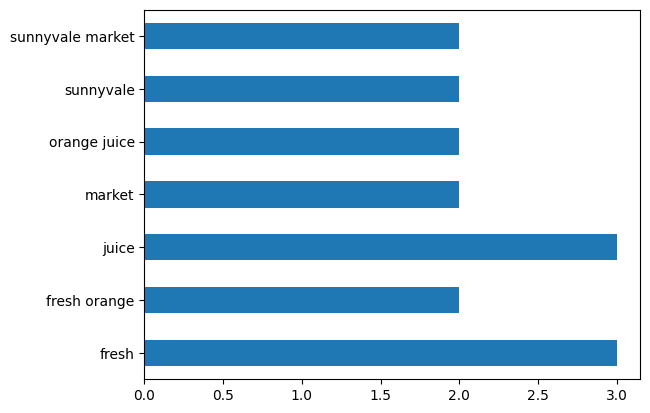

In [12]:
term_freq = dtm_df2.sum()
term_freq.plot(kind = 'barh')

<Axes: >

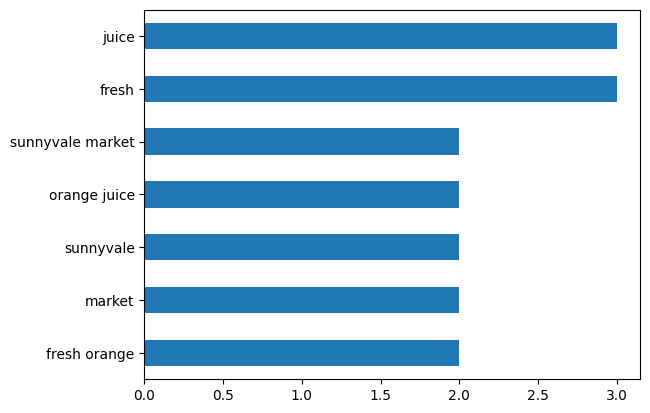

In [13]:
term_freq.sort_values().plot(kind = 'barh')